In [57]:
#import basis and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#use gridsearch to find the best parameters
from sklearn.model_selection import GridSearchCV

In [58]:
#import data
#train_data = pd.read_csv('data/train.csv')
#test_data = pd.read_csv('data/test.csv')

data = pd.read_csv('data/train.csv')

In [59]:
#split data into 30% test and 70% train, random_state = 123, stratify = 'label', xtrain, xtest, ytrain, ytest

train, test = train_test_split(data, test_size=0.3, random_state=123, stratify=data['label'])

In [60]:
#random stratified sample the data 10% for quicker run time
## how can I stratify this?
#train_data = train.sample(frac=0.1, replace=True, random_state=123, )
#test_data = test.sample(frac=0.1, replace=True, random_state=123, )

train_data = train
test_data = test

# train_data = train.sample(frac=0.01, replace=True, random_state=123, )
# test_data = test.sample(frac=0.1, replace=True, random_state=123, )

In [61]:
#confirm stratification
train_data['label'].value_counts()

0    34
3    33
8    33
2    31
5    30
4    30
6    29
9    27
1    26
7    21
Name: label, dtype: int64

In [62]:
#confirm stratification
test_data['label'].value_counts()

7    153
2    139
8    133
1    129
5    126
3    125
4    122
0    118
9    113
6    102
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

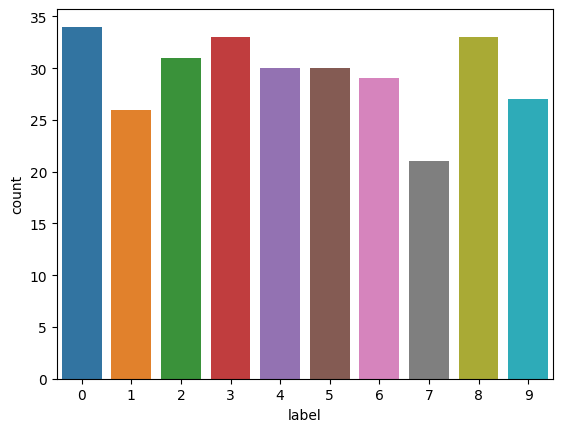

In [63]:
#graph confirm stratification
sns.countplot(x='label', data=train_data)

In [64]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34950,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41451,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35924,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25119,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5444,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test_data.head()
#test_data doesnt have a label column... why is that?

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26062,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22093,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34818,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38536,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15492,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# parameters for SVM model
x_train = train_data.drop('label', axis=1)
y_train = train_data['label']
#drop the label column from the test data if exists
x_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [67]:
model_svc = SVC(random_state=123)

# what are default parameters?
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [68]:
#fit the model
model_svc.fit(x_train, y_train)
#score the model
model_svc.score(x_train, y_train)

0.9829931972789115

In [69]:
# predict the test data
y_pred = model_svc.predict(x_test)

#accuracy score
print(accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

0.8714285714285714
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       118
           1       0.90      0.94      0.92       129
           2       0.87      0.87      0.87       139
           3       0.84      0.82      0.83       125
           4       0.89      0.89      0.89       122
           5       0.77      0.83      0.80       126
           6       0.89      0.92      0.90       102
           7       0.99      0.88      0.93       153
           8       0.83      0.83      0.83       133
           9       0.80      0.83      0.82       113

    accuracy                           0.87      1260
   macro avg       0.87      0.87      0.87      1260
weighted avg       0.87      0.87      0.87      1260



## Seems like the model with default parameters performed best. With an accuracy of 98%

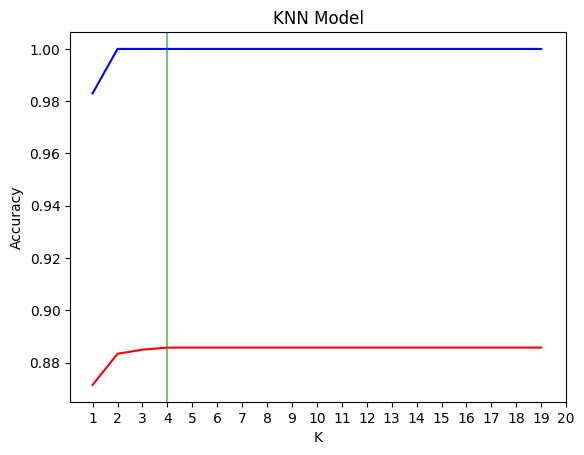

In [70]:
# for loop to create different svm models with different parameters store both the score and the model
training_acc = []
test_acc = []
maxRange = 20
for i in range(1, maxRange):
    model_svc2 = SVC(C=i, random_state=123)
    model_svc2.fit(x_train, y_train)
    training_acc.append(model_svc2.score(x_train, y_train))
    test_acc.append(model_svc2.score(x_test, y_test))
    #if model_svc.score(x_test, y_test) = 1: stop the loop, since no test, use train for now
    # if model_svc.score(x_train, y_train) == 1:
    #     #break after next iteration
    #     break
    #print(model_svc.score(x_train, y_train))

plt.plot(range(1, len(training_acc)+1), training_acc, color="blue", label="training accuracy")
plt.plot(range(1, len(test_acc)+1), test_acc,  color="red", label="test accuracy")

    #add labels and title
plt.title('KNN Model')
plt.xlabel('K')
plt.ylabel('Accuracy')
#make X labels increase by even numbers
plt.xticks(np.arange(1, maxRange+1, 1.0))

#draw a vertical line at the max test accuracy with a 50 percent opacity
plt.axvline(x=test_acc.index(max(test_acc))+1, color='green', alpha=0.5)

In [71]:
# for loop to create different svm models with different gamma, C, and kernel parameters store both the score and the model
# training_acc = []
# test_acc = []
maxRange = 1000

#create a dictionary to store the parameters and the score
param_score = []

ker = ['linear', 'poly', 'rbf', 'sigmoid']

#for every kernel, run 5 random C and gamma values
for i in range(1, 10):
    #randomly select gamma, C, and kernel
    #random float
    gamma = np.random.uniform(1, maxRange)
    C = np.random.uniform(1, maxRange)
    for kernel in ker:
        model_svc3 = SVC(gamma=gamma, C=C, kernel=kernel, random_state=123)

        #fit the model
        model_svc3.fit(x_train, y_train)

        #save the parameters and the score
        param_score.append({'gamma': gamma, 'C': C, 'kernel': kernel, 'score': model_svc3.score(x_test, y_test)})
        #print(model_svc.score(x_train, y_train))

In [72]:
# explain to a 5 year old what does the parameter C mean/do?
# a: C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

# explain to a 5 year old what does the parameter Gamma mean/do?
# a: Gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

# explain to a 5 year old what does the parameter Kernel mean/do?
# a: Kernel is a function that takes low dimensional input space and transforms it into a higher dimensional space.


In [73]:
#convert param_score to a dataframe
param_score = pd.DataFrame(param_score)
param_score

,gamma,C,kernel,score
0,402.173475,231.621151,linear,0.867460
1,402.173475,231.621151,poly,0.821429
2,402.173475,231.621151,rbf,0.093651
3,402.173475,231.621151,sigmoid,0.093651
4,570.303062,468.984985,linear,0.867460
5,570.303062,468.984985,poly,0.821429
6,570.303062,468.984985,rbf,0.093651
7,570.303062,468.984985,sigmoid,0.093651
8,430.132815,403.358219,linear,0.867460
9,430.132815,403.358219,poly,0.821429


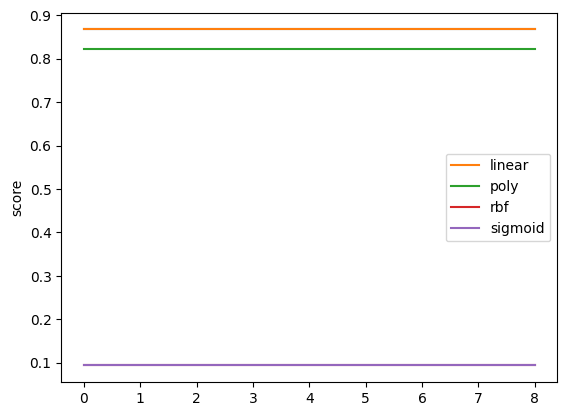

In [74]:
temp = param_score[param_score.kernel == 'linear']
temp.reset_index(inplace=True)
sns.lineplot(x=temp.index, y='score', data=temp)

#for loop to sns plots to compare the different kernels
for kernel in ker:
    temp = param_score[param_score.kernel == kernel]
    temp.reset_index(inplace=True)
    sns.lineplot(x=temp.index, y='score', data=temp, label=kernel)

In [75]:
# #figure size
# plt.figure(figsize=(10, 6))
# #plot the training accuracy from 1 to maxRange
# plt.plot(range(1, len(training_acc)+1), training_acc,color="blue", label="training accuracy")
# plt.plot(range(1, len(training_acc)+1), test_acc, color = 'red', label="testing accuracy")

# #show data by kernel, 
# plt.legend()
# plt.show()


In [76]:
# print(param_score)

#select the kernel of the highest score
bestKerr = param_score[param_score.score == param_score.score.max()].kernel.values[0]
print("Best Kernel: ", bestKerr)

Best Kernel:  linear


In [77]:
#using the best parameters from the loop above
model_svcFinal = SVC(gamma='scale', C=3, kernel=bestKerr, random_state=123)
model_svcFinal.fit(x_train, y_train)
model_svcFinal.score(x_train, y_train)

1.0

In [78]:
#score test data
model_svcFinal.score(x_test, y_test)

0.8674603174603175

In [79]:
#predict test data
y_pred = model_svcFinal.predict(x_test)

#accuracy score

print(accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

0.8674603174603175
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       118
           1       0.87      0.97      0.92       129
           2       0.85      0.79      0.82       139
           3       0.81      0.89      0.85       125
           4       0.86      0.90      0.88       122
           5       0.90      0.75      0.82       126
           6       0.87      0.90      0.88       102
           7       0.91      0.95      0.93       153
           8       0.87      0.77      0.82       133
           9       0.82      0.82      0.82       113

    accuracy                           0.87      1260
   macro avg       0.87      0.87      0.87      1260
weighted avg       0.87      0.87      0.87      1260



In [80]:
model_svcFinal.score(x_train, y_train)

1.0

In [81]:
model_svcFinal.score(x_test, y_test)

0.8674603174603175

In [82]:
# pipeline and gridsearch
# create a pipeline

In [83]:
model_svc4 = make_pipeline(StandardScaler(), SVC(gamma='scale', C=3, kernel='linear', random_state=123))
#fit the model
model_svc4.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=3, kernel='linear', random_state=123))])

In [84]:
#score the model
model_svc4.score(x_train, y_train)

1.0

In [85]:
#score test data
model_svc4.score(x_test, y_test)

0.8531746031746031

In [86]:
#pipeline and gridsearch model 
model_svcFinal2 = make_pipeline(StandardScaler(), SVC())

#parameters to test
ker = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = np.random.uniform(1, maxRange, 5)
C = np.random.uniform(1, maxRange, 5)

#add parameters to a dictionary
param_grid = {'svc__gamma': gamma, 'svc__C': C, 'svc__kernel': ker}

#use gridsearch to find the best parameters
grid = GridSearchCV(model_svcFinal2, param_grid, cv=5, return_train_score=True)
grid.fit(x_train, y_train)

#best parameters
grid.best_params_

# model_svcFinal.fit(x_train, y_train)

{'svc__C': 616.0080284614355,
 'svc__gamma': 448.0926918668793,
 'svc__kernel': 'linear'}

In [87]:
grid.score(x_train, y_train)

1.0

In [88]:
grid.score(x_test, y_test)

0.8531746031746031

In [89]:
# import sklearn.external.joblib as extjoblib
import joblib

# q:  how to I download joblib to my computer?
# a:  pip install joblib

In [90]:
models = [model_svc, model_svc2, model_svc3, model_svcFinal, grid]

#print the training and test score, and the parameters
#save test score associated with the model
test_score = []
for model in models:
    test_score.append(model.score(x_test, y_test))
    #find the best model via the highest test score
    best_model = models[test_score.index(max(test_score))]
    #print parameters of the best model
    print(best_model.get_params())
    #save the best model
joblib.dump(best_model, 'models/model_svcFinal.pkl')

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 19, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 19, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 19, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf

['models/model_svcFinal.pkl']

In [91]:
#save the model in data folder
#joblib.dump(model_svcFinal, 'data/model_svcFinal.pkl')